── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor





The downloaded binary packages are in
	/var/folders/h4/rp9r879x4_37fg__gl5n7ypc0000gn/T//RtmpkqRw82/downloaded_packages


Picking joint bandwidth of 0.0307



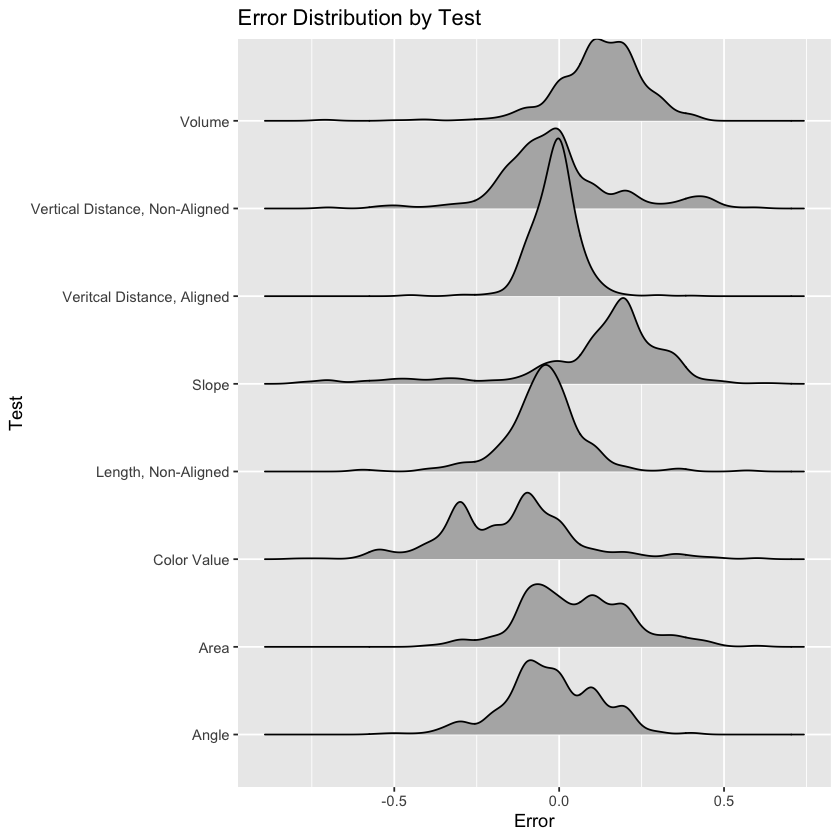

In [1]:
library(ggplot2)
library(tidyverse)
library(scales)
exp <- read.csv("PerceptionExperiment.csv")
exp$Error <- exp$Response - exp$TrueValue
install.packages("ggridges")
library(ggridges)
ggplot(exp, aes(x = Error, y = Test)) + geom_density_ridges() + ggtitle("Error Distribution by Test")

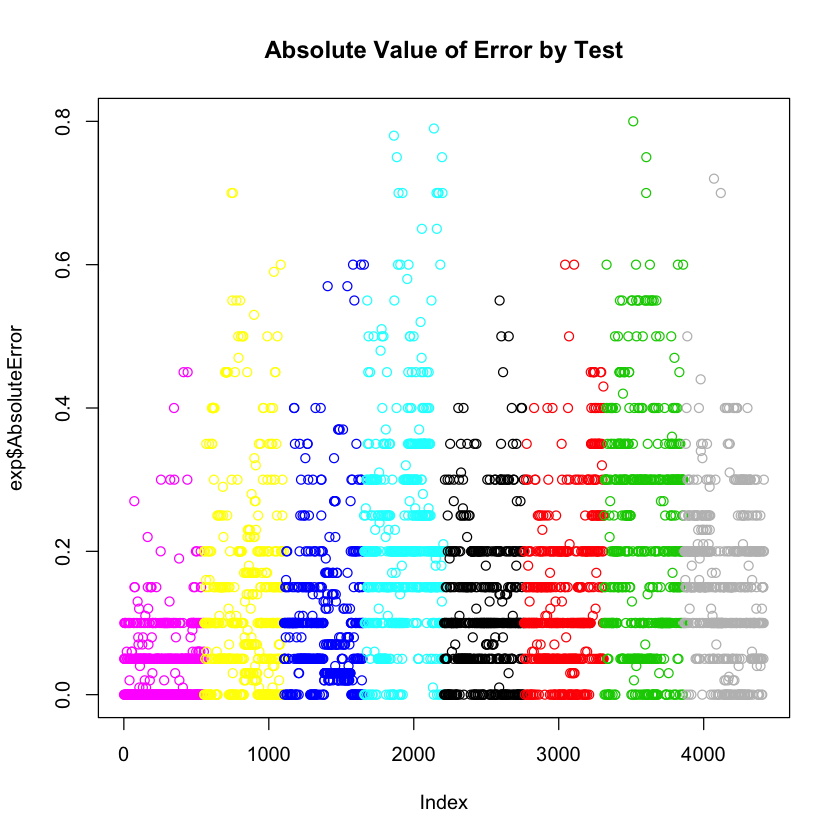

In [2]:
exp$AbsoluteError <- abs(exp$Response - exp$TrueValue)
plot(exp$AbsoluteError, col=exp$Test, main="Absolute Value of Error by Test")

Picking joint bandwidth of 0.0449



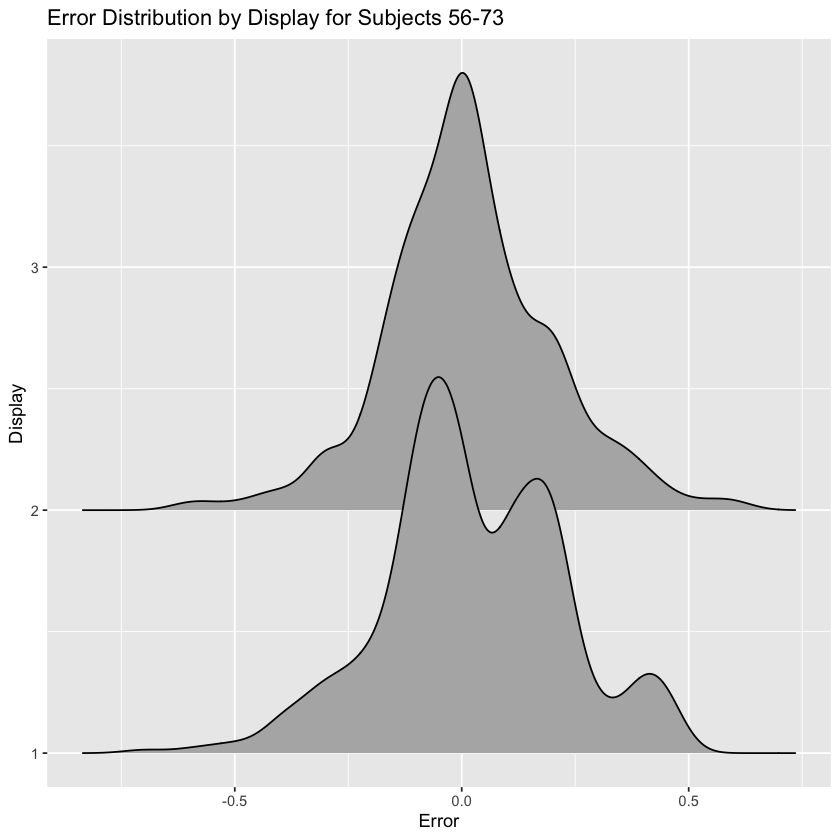

In [3]:
expnew <- exp %>% filter(Subject > 55 & Subject < 74)
ggplot(expnew, aes(x = Error, y = Display, group=Display)) + geom_density_ridges() + ggtitle("Error Distribution by Display for Subjects 56-73")

Picking joint bandwidth of 0.149

Warning message:
“Removed 1 rows containing non-finite values (stat_density_ridges).”


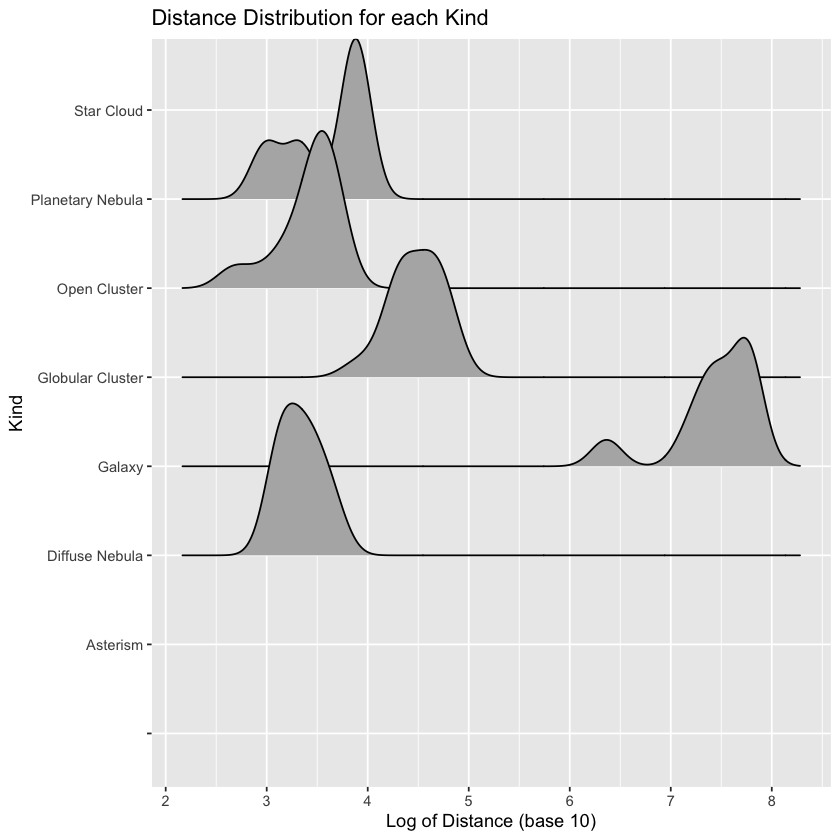

In [21]:
mess <- read.csv("MessierData.csv")
ggplot(mess, aes(x = Distance, y = Kind)) + geom_density_ridges() + ggtitle("Distance Distribution for each Kind") + scale_x_log10(breaks = 10^(-2:20),labels = trans_format("log10", math_format(.x))) + xlab("Log of Distance (base 10)")

Warning message:
“Removed 1 rows containing missing values (geom_point).”


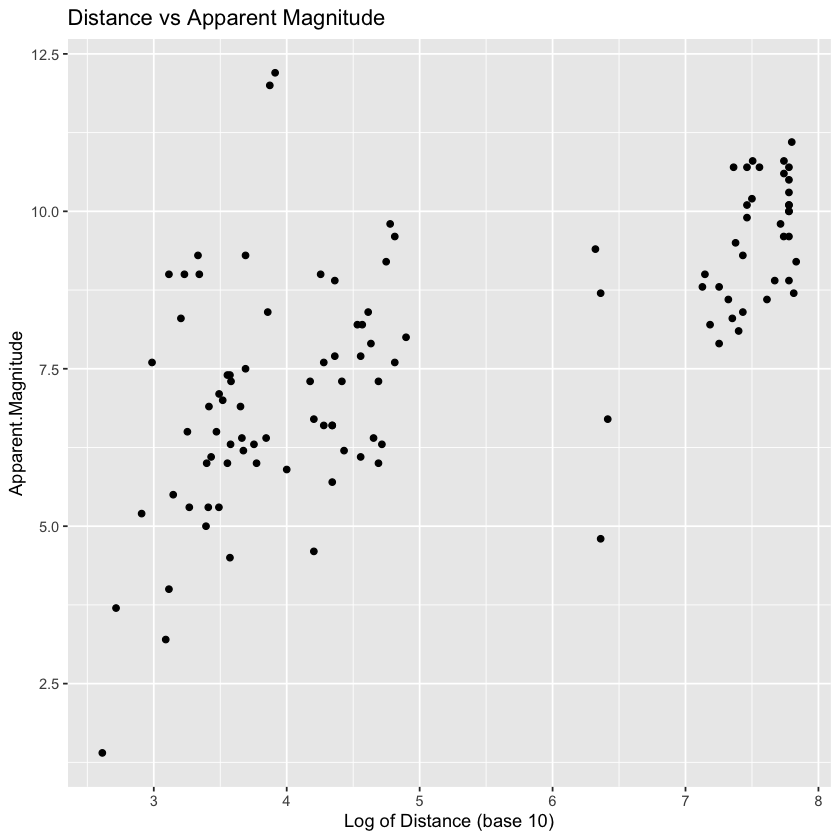

In [5]:
ggplot(data = mess, aes(x = Distance, y = Apparent.Magnitude)) + geom_point() + ggtitle("Distance vs Apparent Magnitude") + scale_x_log10(breaks = 10^(2:10),labels = trans_format("log10", math_format(.x))) + xlab("Log of Distance (base 10)")

Warning message:
“Removed 1 rows containing missing values (geom_point).”


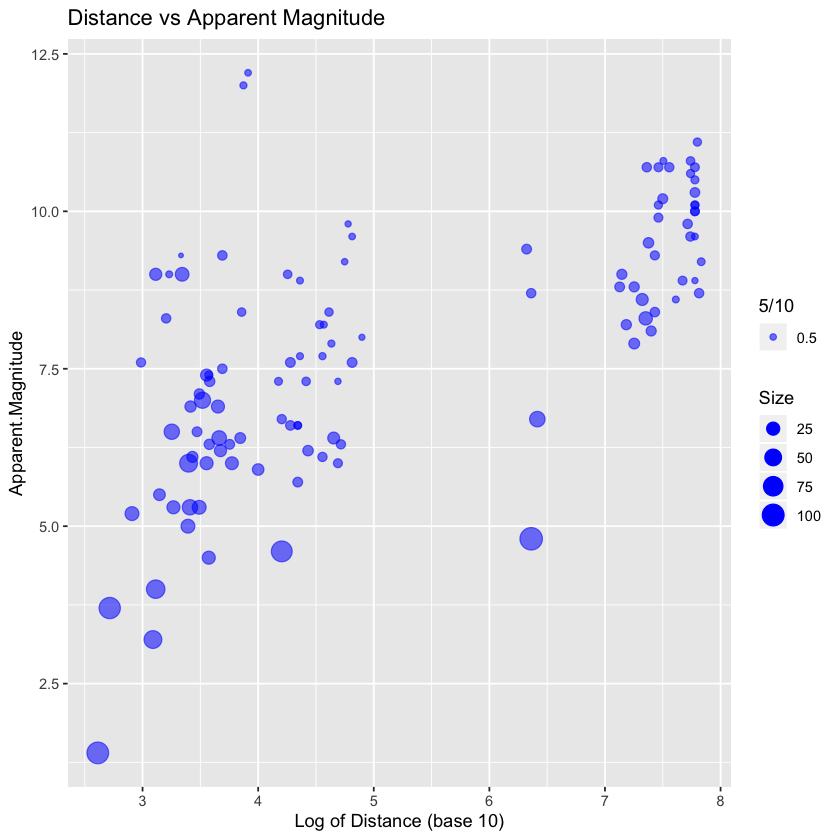

In [25]:
ggplot(data = mess, aes(x = Distance, y = Apparent.Magnitude)) + geom_point(aes(size=Size, alpha=5/10), colour="blue") + ggtitle("Distance vs Apparent Magnitude") + scale_x_log10(breaks = 10^(2:10),labels = trans_format("log10", math_format(.x))) + xlab("Log of Distance (base 10)")

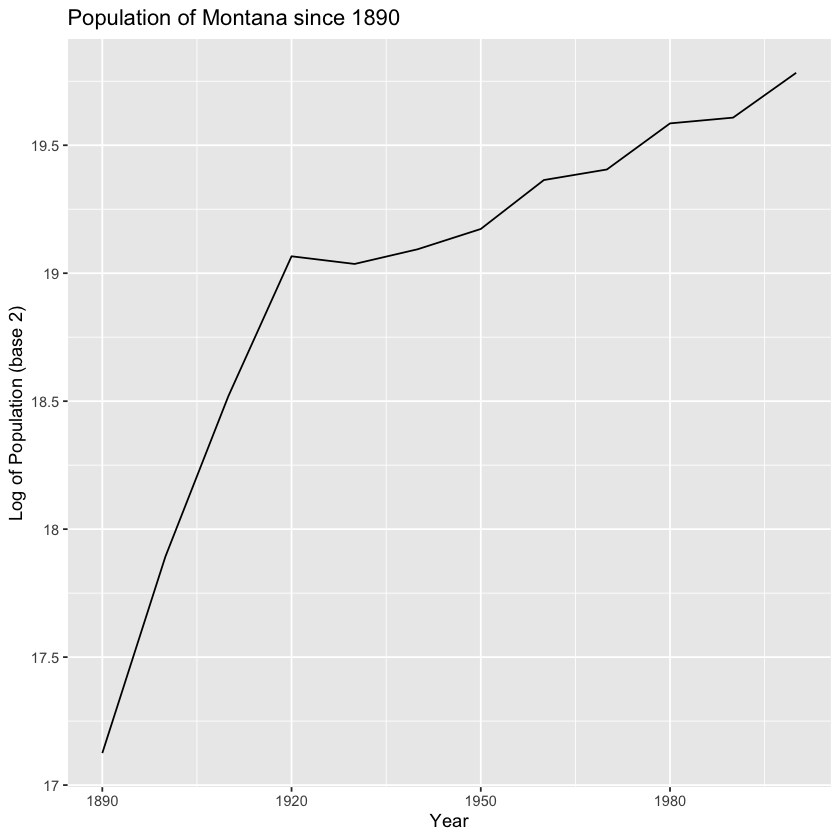

In [7]:
library(scales)
pop <- read.csv("MontanaPopulationData.csv")
ggplot(pop, aes(y = Population, x = Year)) + geom_line() + scale_y_continuous(
    trans = "log2",
    breaks = trans_breaks("log2", function(x) 2^x),
    labels = trans_format("log2", math_format(.x))) + ggtitle("Population of Montana since 1890") + ylab("Log of Population (base 2)")

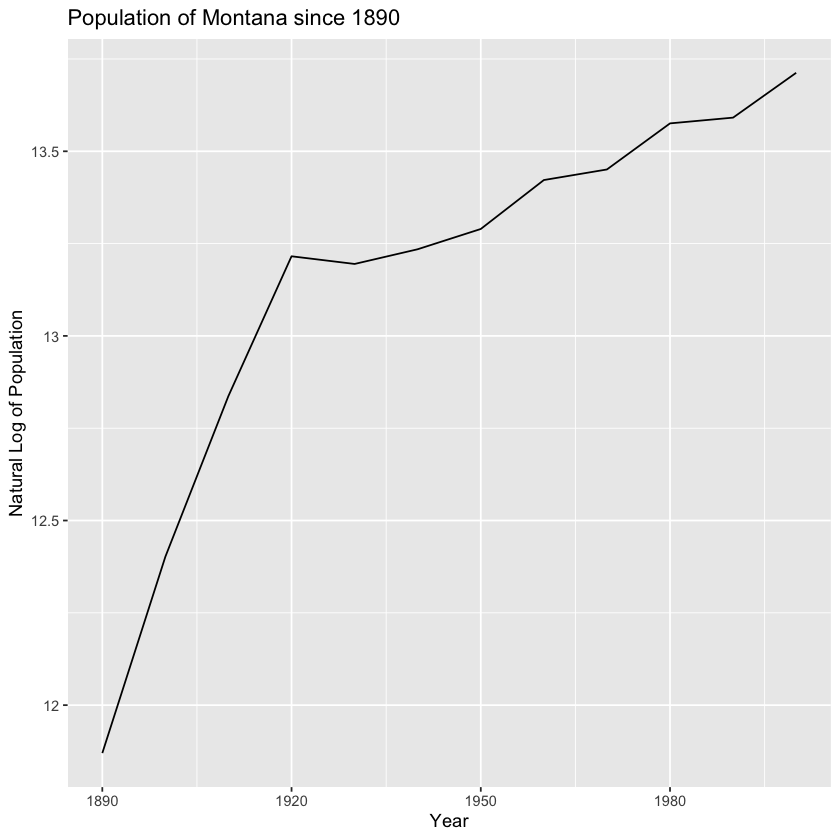

In [8]:
ggplot(pop, aes(y = Population, x = Year)) + geom_line() + scale_y_continuous(trans = log_trans(), breaks = trans_breaks("log", function(x) exp(x)), labels = trans_format("log", math_format(.x))) + ggtitle("Population of Montana since 1890") + ylab("Natural Log of Population")  

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


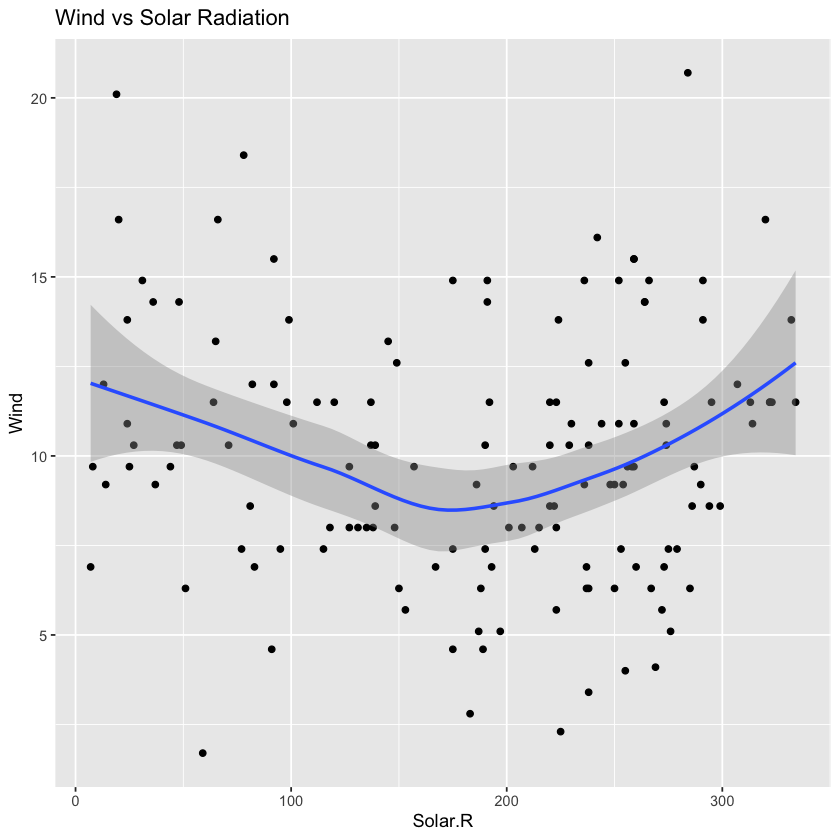

In [9]:
air <- read.csv("AirQuality.csv")
ggplot(air, aes(x=Solar.R, y=Wind)) + geom_point()+ geom_smooth() + ggtitle("Wind vs Solar Radiation")

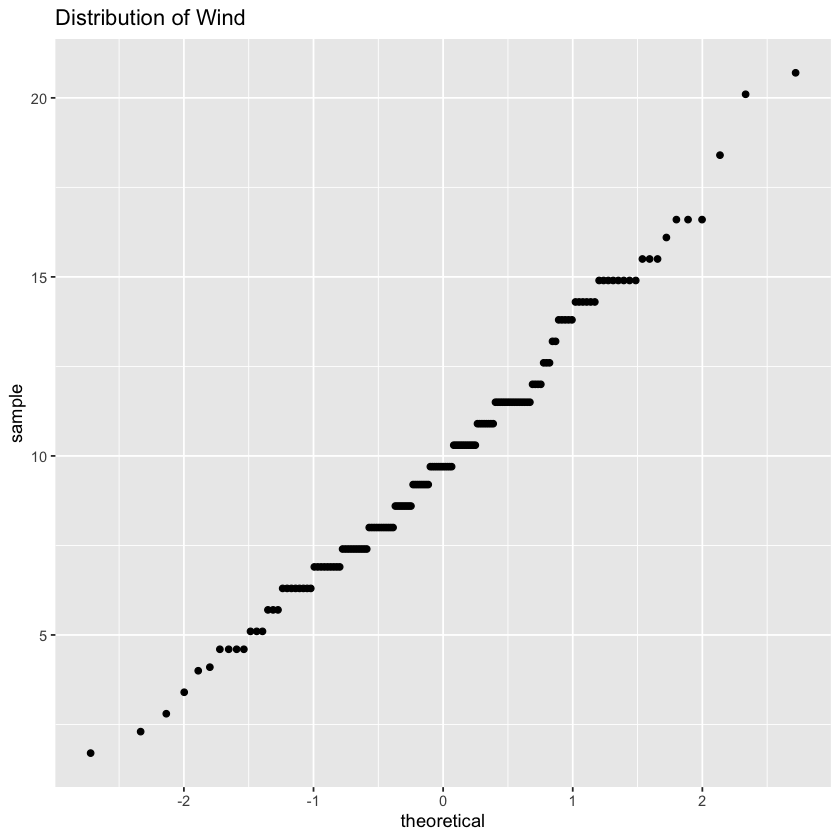

In [10]:
ggplot(air, aes(sample=Wind)) + geom_qq() + ggtitle("Distribution of Wind")

Warning message:
“Removed 7 rows containing non-finite values (stat_qq).”


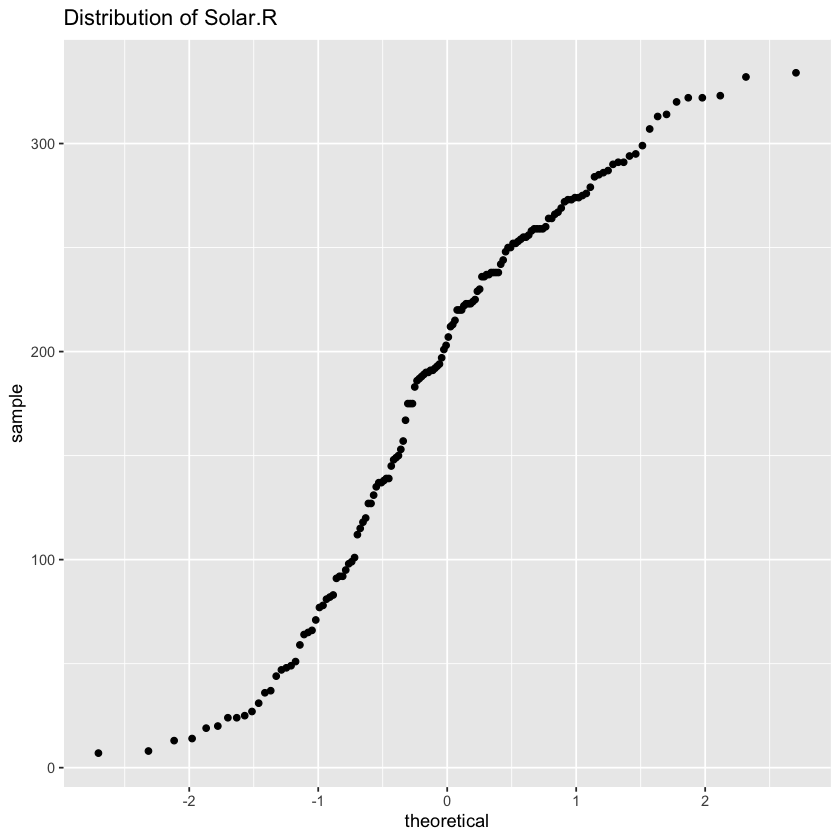

In [11]:
ggplot(air, aes(sample=Solar.R)) + geom_qq() + ggtitle("Distribution of Solar.R")

In [17]:
air_long <- gather(air, Measurements, Values, Ozone:Temp, factor_key=TRUE)
air_long_new <- air_long[order(air_long$Month, air_long$Day),]


The downloaded binary packages are in
	/var/folders/h4/rp9r879x4_37fg__gl5n7ypc0000gn/T//RtmpkqRw82/downloaded_packages


Warning message:
“Removed 44 rows containing missing values (position_beeswarm).”


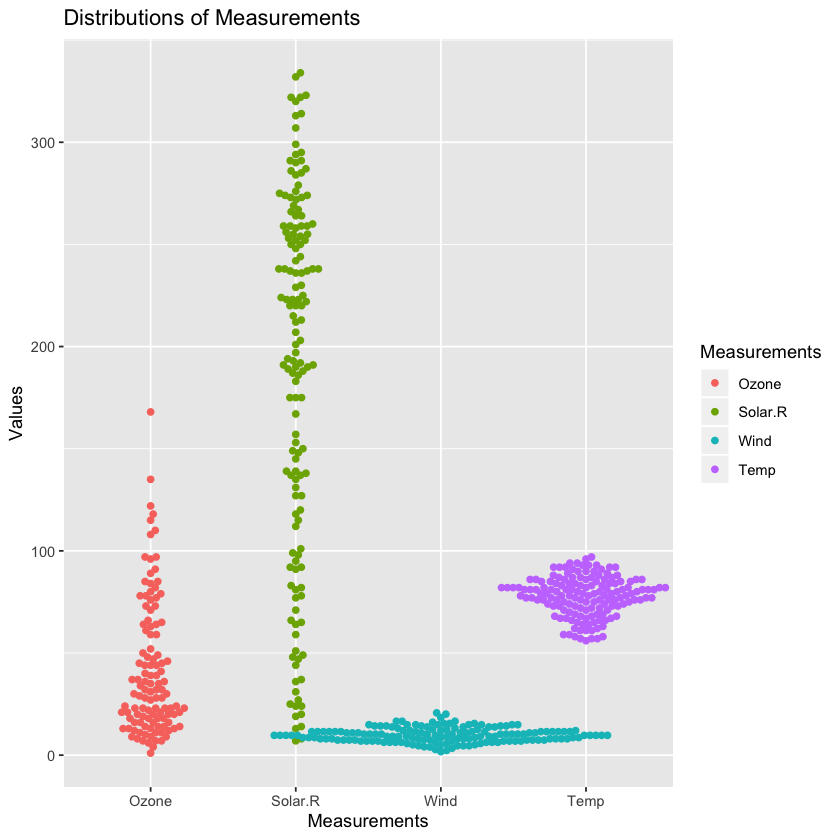

In [18]:
install.packages("ggbeeswarm")
library(ggbeeswarm)
ggplot(air_long_new, aes(Measurements, Values)) +
  geom_beeswarm(aes(colour=Measurements)) + ggtitle("Distributions of Measurements")